# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Confidence Intervals: Covid Data

In [2]:
covid_data = Table.read_table("Covid Data_subset.csv")
covid_data

USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,1,1,1,3/5/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
2,1,1,1,12/6/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2
2,1,2,2,9999-99-99,2,2,30,97,2,2,2,2,2,2,2,2,2,2,3,2
2,1,1,1,9999-99-99,97,2,23,2,2,2,2,2,2,2,2,2,2,2,3,97
2,1,2,1,9999-99-99,97,2,54,97,2,2,2,2,2,2,2,2,2,2,3,97
2,1,2,1,9999-99-99,97,2,30,97,2,2,2,2,2,2,2,2,2,2,3,97
2,1,1,1,9999-99-99,97,2,38,2,2,2,2,2,2,2,2,2,1,2,3,97
2,1,2,1,9999-99-99,97,2,49,97,2,2,2,2,2,2,2,2,2,2,3,97


In [11]:
#Let's consider this data set to be our population, and calculate the death rate of patients with covid.  
#Those with an impossible date for death can be assumed to live in this data set
true_death = 100*(1 - (covid_data.where('DATE_DIED','9999-99-99').num_rows / covid_data.num_rows))
true_death

7.337672555611185

### Let's play out a scenario

Suppose that we are still in the early stages of the covid pandemic. You work for a hospital that has seen 100 patients so far. You want to know how deadly this illness is to the population. 

In [4]:
#we proceed by taking a sample of 100 from the covid table. Let's assume that these are the 100 patients we saw.
covid_sample = covid_data.sample(100,with_replacement = False)
covid_sample

USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,12,1,1,9999-99-99,97,2,54,2,2,2,2,2,2,2,2,2,2,2,5,97
2,12,1,1,9999-99-99,97,2,37,2,2,2,2,2,2,2,2,2,2,2,7,97
1,12,2,1,9999-99-99,97,2,39,97,2,2,2,2,2,2,2,2,2,2,3,97
2,12,1,1,9999-99-99,97,2,33,2,2,2,2,2,2,2,2,2,2,2,7,97
2,12,2,1,9999-99-99,97,2,34,97,2,2,2,2,2,2,2,2,2,1,3,97
2,5,2,1,9999-99-99,97,2,45,97,2,2,2,2,2,2,2,1,2,2,3,97
2,12,1,2,9999-99-99,2,1,44,2,2,2,2,2,2,2,2,2,2,2,6,2
2,9,2,1,9999-99-99,97,2,38,97,2,2,2,2,2,2,2,2,2,2,7,97
2,12,2,2,9999-99-99,2,2,44,97,2,2,2,2,1,2,2,1,2,2,3,2
1,3,2,1,9999-99-99,97,2,47,97,2,2,2,2,1,2,2,1,2,1,7,97


Then we can define the following functions to construct an upper and lower bound for the confidence interval

In [5]:
def confidence_interval_for_death_rate(level):
    stats = make_array()
    for i in np.arange(1000):
        stat = 100*(1 - ((covid_sample.sample()).where('DATE_DIED','9999-99-99').num_rows / covid_sample.num_rows))
        stats = np.append(stats,stat)
    lower_bound = percentile((100 - level)/2,stats)
    upper_bound = percentile( 100 - ((100 - level)/2) , stats)
    return stats, lower_bound, upper_bound

In [6]:
stats_array,lower_bound,upper_bound = confidence_interval_for_death_rate(95)

In [7]:
stats_array

array([  4.,  10.,   4.,   7.,   8.,   5.,   9.,   7.,   5.,   7.,  10.,
         7.,  10.,   6.,   8.,   5.,   5.,   6.,  10.,   6.,   7.,   4.,
         1.,  11.,   6.,   5.,   6.,   8.,   8.,   4.,   7.,   5.,   5.,
         6.,   5.,   4.,   5.,   7.,   2.,   4.,  10.,   1.,   8.,   6.,
         6.,   6.,   6.,   5.,   8.,  10.,  10.,   6.,   2.,   6.,   2.,
         9.,   7.,   4.,   7.,   2.,   2.,   5.,  10.,   4.,   7.,   6.,
         8.,  11.,   3.,   5.,   8.,   7.,   2.,   9.,   2.,   3.,   5.,
         4.,   6.,   2.,   5.,   6.,   7.,   2.,   5.,   6.,   8.,   6.,
         6.,   4.,   6.,   5.,   7.,   4.,   8.,   9.,   6.,   5.,   8.,
         6.,   4.,   3.,   6.,   6.,   6.,   3.,   9.,   3.,   3.,   7.,
         8.,   5.,   8.,   7.,  10.,   9.,   3.,   5.,   7.,   7.,  11.,
         5.,   5.,   5.,   6.,   4.,   8.,   2.,   5.,   4.,   4.,   5.,
         2.,  13.,   6.,   7.,   8.,   5.,   4.,   7.,   6.,   9.,   4.,
         4.,   7.,   4.,   4.,   7.,   5.,   6.,   

In [8]:
lower_bound

2.0000000000000018

In [9]:
upper_bound

10.999999999999998

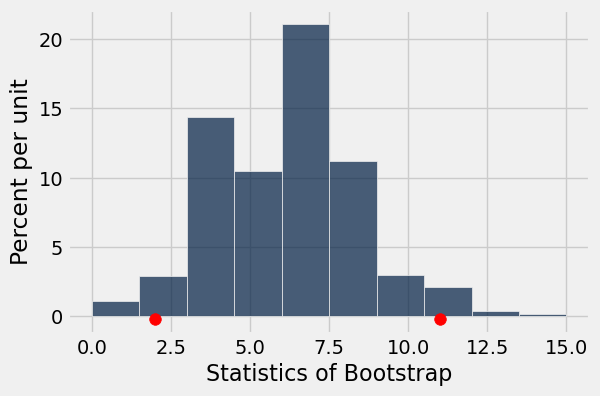

In [13]:
Table().with_columns('Statistics of Bootstrap', stats_array).hist()
plt.scatter(lower_bound, -0.002, color='red', s=70);
plt.scatter(upper_bound, -0.002, color='red', s=70);
#plt.scatter(true_death, -0.002, color='green', s=70)

In [14]:
def confidence_interval_lower_b(tbl,level,column_label):
    stats = make_array()
    for i in np.arange(10000):
        stat = np.mean(tbl.sample().column(column_label))
        stats = np.append(stats,stat)
    return percentile( (100 - level)/2 , stats)

def confidence_interval_upper_b(tbl,level,column_label):
    stats = make_array()
    for i in np.arange(10000):
        stat = np.mean(tbl.sample().column(column_label))
        stats = np.append(stats,stat)
    return percentile( 100 - ((100 - level)/2) , stats)

In [15]:
column_to_look_at = 'AGE'
level = 95
print('The confidence interval for',column_to_look_at) 
print('is from',confidence_interval_lower_b(covid_sample,level,column_to_look_at))
print('up to',confidence_interval_upper_b(covid_sample,level,column_to_look_at))

The confidence interval for AGE
is from 39.7
up to 45.26


In [16]:
np.mean(covid_data.column('AGE'))

41.809072312424007

# Confidence Interval Practice: Math211 Class Survey

In [17]:
math211_survey = Table.read_table("Math211_FallSurvey.csv")
math211_survey

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green
8/17/2023 16:38,Christian Le,3.96,6,Cats,Right-handed,On my side,Yes,STAYC,Costa Rica,Local,UC Grad,Loss of loved ones,"R&B, K-POP",Purple
8/17/2023 16:54,Christian Le,2.98,6,nan,Left-handed,On my side,Yes,New Jeans,Hawaii,Local,nan,Death,R&B,Green
8/17/2023 16:55,Christian Le,3.8,8,Dogs,Right-handed,On my side,Yes,New Jeans,Hawaii,Local,UC,Being alone,R&B,Blue
8/17/2023 17:00,Christian Le,4,3,nan,Right-handed,On my back,No,nan,Japan,California (not Bay Area),CSU,Not being accepted into career program,Hip hop,Khaki
8/17/2023 18:13,Christian Le,4,2,"Cats, Dogs, Reptiles",Both,On my stomach,Yes,New Jeans,Dubai,Local,UC,Insects,Pop,Red
8/17/2023 20:38,Casey So,3.86,3,Dogs,Right-handed,On my back,Yes,Seventeen,Korea,Local,UC,Birds,Pop,Light Blue
8/17/2023 20:43,Casey So,3.2,4,nan,Right-handed,On my side,Yes,Twice,Philippines,Local,UC,Death,Pop,Blue


In [22]:
confidence_interval_lower_b(math211_survey,95,"GPA")

3.4654482758620686

In [23]:
confidence_interval_lower_b(math211_survey,95,"GPA")

3.466728448275862

In [20]:
confidence_interval_lower_b(math211_survey,95,"introversion/extroversion")

4.8922413793103452

In [21]:
confidence_interval_upper_b(math211_survey,95,"introversion/extroversion")

5.4137931034482758